# Loading Data


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape


(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [8]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df1_new = df.drop(['society','availability'],axis='columns')
df1_new.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Handling Missing Values

In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df1_new.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

<AxesSubplot:>

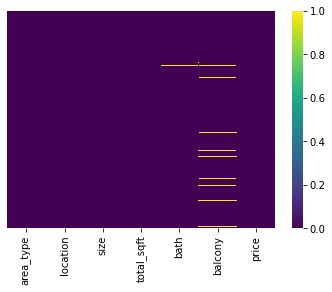

In [12]:
import seaborn as sns
sns.heatmap(df1_new.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [13]:
df1_new['balcony_mean'] = df1_new['balcony'].fillna(df1_new.balcony.mean())
df1_new['balcony_median'] = df1_new['balcony'].fillna(df1_new.balcony.median())
df1_new.head(8)

,area_type,location,size,total_sqft,bath,balcony,price,balcony_mean,balcony_median
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1.000000,1.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,3.000000,3.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.000000,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1.000000,1.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1.000000,1.0
5,Super built-up Area,Whitefield,2 BHK,1170,2.0,1.0,38.00,1.000000,1.0
6,Super built-up Area,Old Airport Road,4 BHK,2732,4.0,NaN,204.00,1.584376,2.0
7,Super built-up Area,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00,1.584376,2.0


In [14]:
print('Original balcony count variable variance',df1_new.balcony.var())
print('Balcony count variance after mean imputation',df1_new.balcony_mean.var())
print('Balcony count variance after median imputation',df1_new.balcony_median.var())

Original balcony count variable variance 0.6679195138849303
Balcony count variance after mean imputation 0.6373794595298127
Balcony count variance after median imputation 0.6449168836229116


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0.5, 0, 'balcony_count')

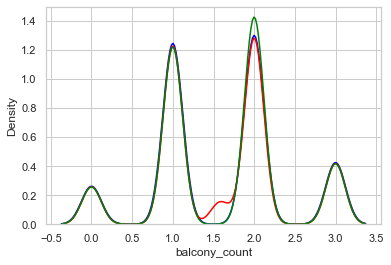

In [15]:
sns.set(style = "whitegrid")
sns.distplot(df1_new.balcony,hist = False,kde = True,color='blue')
sns.distplot(df1_new.balcony_mean,hist = False,kde = True,color='red')
sns.distplot(df1_new.balcony_median,hist = False,kde = True,color='green')
plt.xlabel('balcony_count')


In [16]:
df1_new[df1_new.balcony.isnull()]

,area_type,location,size,total_sqft,bath,balcony,price,balcony_mean,balcony_median
6,Super built-up Area,Old Airport Road,4 BHK,2732,4.0,NaN,204.00,1.584376,2.0
7,Super built-up Area,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00,1.584376,2.0
9,Plot Area,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00,1.584376,2.0
34,Built-up Area,Kasturi Nagar,3 BHK,1925,3.0,NaN,125.00,1.584376,2.0
40,Built-up Area,Murugeshpalya,2 BHK,1296,2.0,NaN,81.00,1.584376,2.0
...,...,...,...,...,...,...,...,...,...
13277,Plot Area,Kundalahalli Colony,7 Bedroom,1400,7.0,NaN,218.00,1.584376,2.0
13279,Plot Area,Vishwanatha Nagenahalli,6 Bedroom,1200,5.0,NaN,130.00,1.584376,2.0
13306,Plot Area,Rajarajeshwari Nagara,4 Bedroom,1200,5.0,NaN,325.00,1.584376,2.0
13309,Super built-up Area,Yeshwanthpur,3 BHK,1675,3.0,NaN,92.13,1.584376,2.0


In [17]:
df1_new.balcony.fillna(df1_new.balcony.median(),inplace = True)

In [18]:
df1_new.head(8)

,area_type,location,size,total_sqft,bath,balcony,price,balcony_mean,balcony_median
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1.000000,1.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,3.000000,3.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.000000,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1.000000,1.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1.000000,1.0
5,Super built-up Area,Whitefield,2 BHK,1170,2.0,1.0,38.00,1.000000,1.0
6,Super built-up Area,Old Airport Road,4 BHK,2732,4.0,2.0,204.00,1.584376,2.0
7,Super built-up Area,Rajaji Nagar,4 BHK,3300,4.0,2.0,600.00,1.584376,2.0


In [19]:
df1_new = df1_new.drop(['balcony_mean','balcony_median'],axis = 'columns')
df1_new.head(8)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Super built-up Area,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,Super built-up Area,Old Airport Road,4 BHK,2732,4.0,2.0,204.00
7,Super built-up Area,Rajaji Nagar,4 BHK,3300,4.0,2.0,600.00


In [20]:
df1_new.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [21]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [22]:
df2_new = df1_new.dropna()
df2_new.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

# Feature Engineering

1) Adding new feature called 'bhk'

In [23]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
df2_new['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
df2['bhk'] = df2['size'].apply(lambda x :int(x.split(' ')[0]))

<ipython-input-25-90e3e29f5699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x :int(x.split(' ')[0]))


In [26]:
df2_new['bhk'] = df2_new['size'].apply(lambda x :int(x.split(' ')[0]))

<ipython-input-26-6abbda91042e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['bhk'] = df2_new['size'].apply(lambda x :int(x.split(' ')[0]))


In [27]:
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [28]:
df2_new.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [29]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [31]:
df2[~df2.total_sqft.apply(is_float)].head(10)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [32]:
def convert_rng_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [33]:
convert_rng_num('216')

216.0

In [34]:
convert_rng_num('4-6')

5.0

In [35]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_rng_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [36]:
df3_new = df2_new.copy()
df3_new['total_sqft'] = df3_new['total_sqft'].apply(convert_rng_num)
df3_new.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [37]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [38]:
df3_new.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
balcony                        0.0
price                        186.0
bhk                              4
Name: 30, dtype: object

2) Adding a new feature called 'price_per_sqft'

In [39]:
df4 = df3.copy()
df4_new = df3_new.copy()

In [40]:
df4['price_per_sqft'] = df4['price']* 100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [41]:
df4_new['price_per_sqft'] = df4_new['price']* 100000/df4['total_sqft']
df4_new.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [42]:
len(df4.location.unique())
len(df4_new.location.unique())

1304

In [43]:
df4.location = df4.location.apply(lambda x: x.strip())
df4_new.location = df4_new.location.apply(lambda x: x.strip())

In [44]:
len(df4.location.unique())
len(df4_new.location.unique())

1293

In [45]:
loc_stats = df4.groupby('location')['location'].count().sort_values(ascending = False)
loc_stats1 = df4_new.groupby('location')['location'].count().sort_values(ascending = False)
loc_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [46]:
len(loc_stats1[loc_stats<=10])

1052

In [47]:
df4_new.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [48]:
df4_new.balcony.unique()

array([1., 3., 2., 0.])

# Dimensionality Reduction
Any location with lesser than 10 occurences are tagged as 'other locations.

In [49]:
#Dimensionality Reduction
loc_lessthan10 = loc_stats[loc_stats<=10]
loc_lessthan10


location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [50]:
len(df4.location.unique())
len(df4_new.location.unique())

1293

In [51]:
df4.location = df4.location.apply(lambda x: 'other' if x in loc_lessthan10 else x)
df4_new.location = df4_new.location.apply(lambda x: 'other' if x in loc_lessthan10 else x)

In [52]:
len(df4.location.unique())
len(df4_new.location.unique())

242

# Outlier Removal Using Business Logic
Removing outliers wherein the sq.ft per bhk is less than 300.



In [53]:
df4[df4.total_sqft/df4.bhk < 300].head()
df4_new[df4_new.total_sqft/df4_new.bhk < 300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [54]:
df4_new.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2410
Carpet  Area              87
Plot  Area              2009
Super built-up  Area    8740
Name: area_type, dtype: int64

In [55]:
df4.shape
df4_new.shape

(13246, 9)

In [56]:
df5 = df4[~(df4.total_sqft/df4.bhk < 300)]
df5.shape
df5_new = df4_new[~(df4_new.total_sqft/df4_new.bhk < 300)]
df5_new.shape

(12502, 9)

In [57]:
df5_new.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2343
Carpet  Area              83
Plot  Area              1386
Super built-up  Area    8690
Name: area_type, dtype: int64

# Outlier Removal Using Standard Deviation and Mean

The rows are grouped based on location and if the price per sqft of 2 bhk (for example) is lesser than 1 bhk it is considered as an outlier and removed.

In [58]:
df5.price_per_sqft.describe()
df5_new.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [59]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    #key refers to unique value
    for key,sub_df in df.groupby('location'):
        m = np.mean(df.price_per_sqft)
        sd = np.std(df.price_per_sqft)
        res_df = sub_df[(sub_df.price_per_sqft > (m-sd)) & (sub_df.price_per_sqft <= (m+sd))]
        df_out = pd.concat([df_out,res_df],ignore_index = True)
    return df_out
    


In [60]:
df6 = remove_price_outliers(df5)
df6.shape
df6_new = remove_price_outliers(df5_new)
df6_new.shape

(11294, 9)

In [61]:
r = df6_new[(df6_new.location == 'Hebbal') & (df6_new.bhk == 2)]
r

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
3143,Super built-up Area,Hebbal,2 BHK,1349.0,2.0,1.0,98.2,2,7279.466271
3150,Super built-up Area,Hebbal,2 BHK,1337.0,2.0,1.0,82.0,2,6133.133882
3151,Super built-up Area,Hebbal,2 BHK,1349.0,2.0,1.0,98.0,2,7264.640474
3152,Built-up Area,Hebbal,2 BHK,1000.0,2.0,2.0,45.0,2,4500.000000
3154,Super built-up Area,Hebbal,2 BHK,1036.0,2.0,1.0,50.0,2,4826.254826
...,...,...,...,...,...,...,...,...,...
3289,Super built-up Area,Hebbal,2 BHK,1162.0,2.0,1.0,59.0,2,5077.452668
3290,Super built-up Area,Hebbal,2 BHK,1294.0,2.0,1.0,115.0,2,8887.171561
3292,Built-up Area,Hebbal,2 BHK,1150.0,2.0,1.0,57.0,2,4956.521739
3298,Super built-up Area,Hebbal,2 BHK,1349.0,2.0,1.0,98.0,2,7264.640474


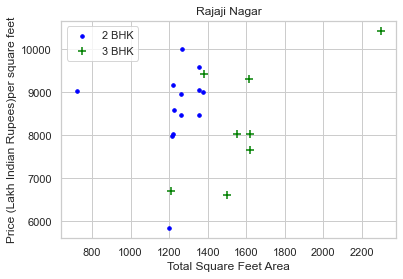

In [62]:
def plot_scatter(df,loc):
    bhk2 = df[(df.location == loc) & (df.bhk == 2)]
    bhk3 = df[(df.location == loc) & (df.bhk == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color = 'blue',marker = '.',label ='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color = 'green',marker = '+',label ='3 BHK',s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)per square feet")
    plt.rcParams["figure.figsize"] = (14,8)
    plt.title(loc)
    plt.legend()
    
plot_scatter(df6,"Rajaji Nagar")

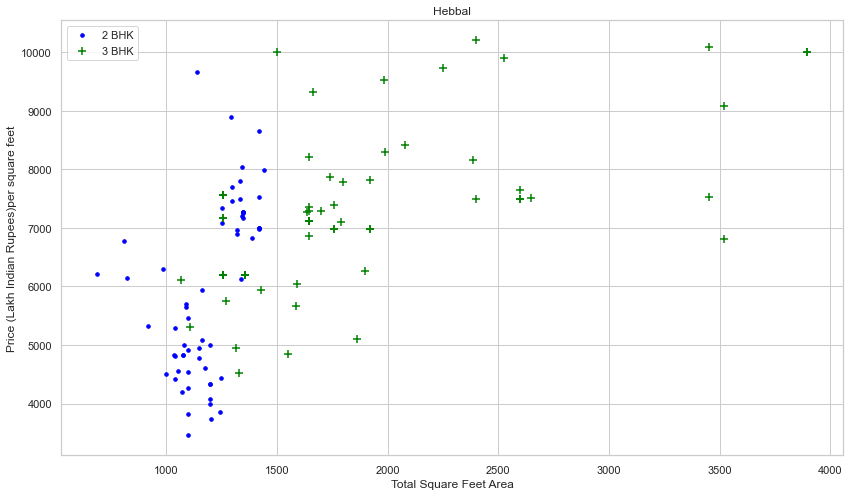

In [63]:
plot_scatter(df6,"Hebbal")

In [64]:
df6.shape
df6_new.shape

(11294, 9)

In [65]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_details = {}
        for bhk,bhk_df in loc_df.groupby('bhk'):
            
            bhk_details[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
                
            }
            
        for bhk,bhk_df in loc_df.groupby('bhk'):
            
            det = bhk_details.get(bhk-1)
            if det and det['count'] > 5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft < (det['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')

df7 = remove_bhk_outlier(df6)
df7.shape
df7_new = remove_bhk_outlier(df6_new)
df7_new.shape

(8089, 9)

In [66]:
for loc,loc_df in df6.groupby('location'):
        
        if loc == 'Rajaji Nagar':
          mean = 0
          for bhk,bhk_df in loc_df.groupby('bhk'):
             if bhk == 2:
                 print(loc)
                 print(bhk)
                 mean = np.mean(bhk_df.price_per_sqft)
                 print(mean)
             if bhk == 3:
                r = bhk_df[bhk_df.price_per_sqft > mean]
                print(r)



Rajaji Nagar
2
8630.831377925248
          location       size  total_sqft  bath  price  bhk  price_per_sqft
6651  Rajaji Nagar      3 BHK      1613.0   3.0  150.0    3     9299.442033
6652  Rajaji Nagar      3 BHK      1380.0   3.0  130.0    3     9420.289855
6668  Rajaji Nagar  3 Bedroom      2300.0   4.0  240.0    3    10434.782609


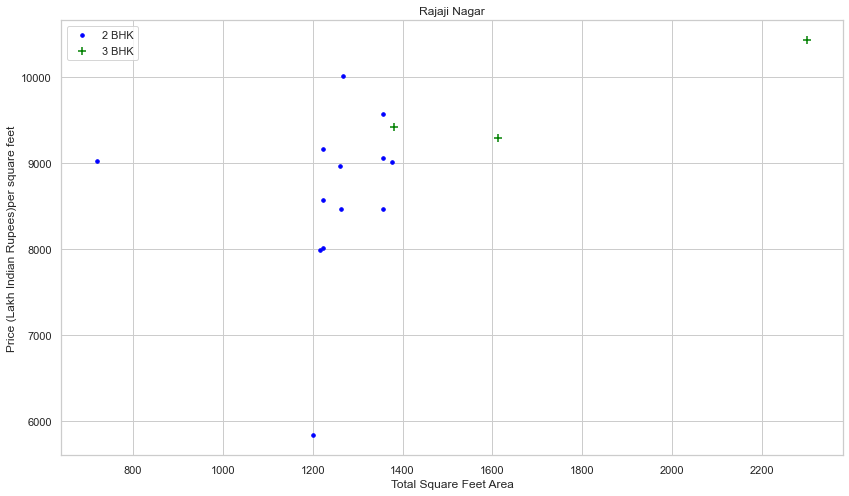

In [67]:
plot_scatter(df7,"Rajaji Nagar")

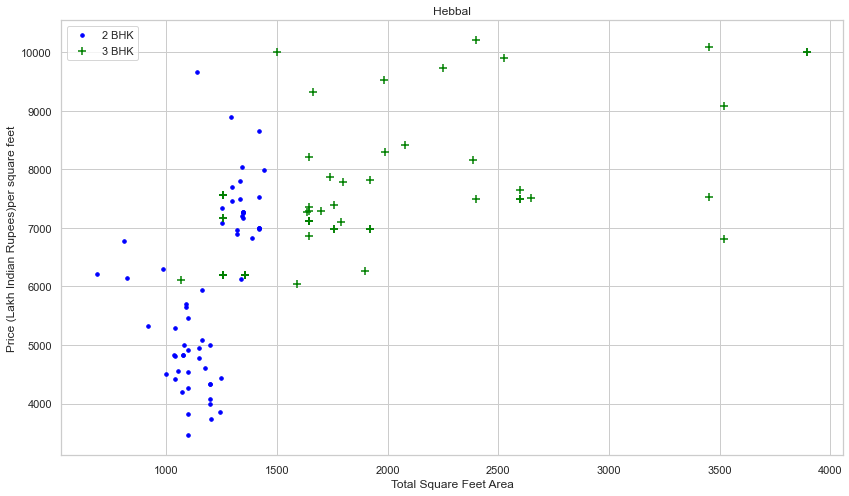

In [68]:
plot_scatter(df7,"Hebbal")

# Outlier Removal Using Bathrooms Feature

Removing rows where the number of bathrooms is greater than 'number of bedrooms+2'.

In [69]:
df7.bath.unique()

array([ 3.,  5.,  4.,  2.,  1.,  8.,  7.,  6.,  9., 10., 12., 16., 13.])

In [70]:
df7_new.balcony.unique()

array([2., 1., 3., 0.])

In [71]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6121,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9699,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9775,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
10444,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10748,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

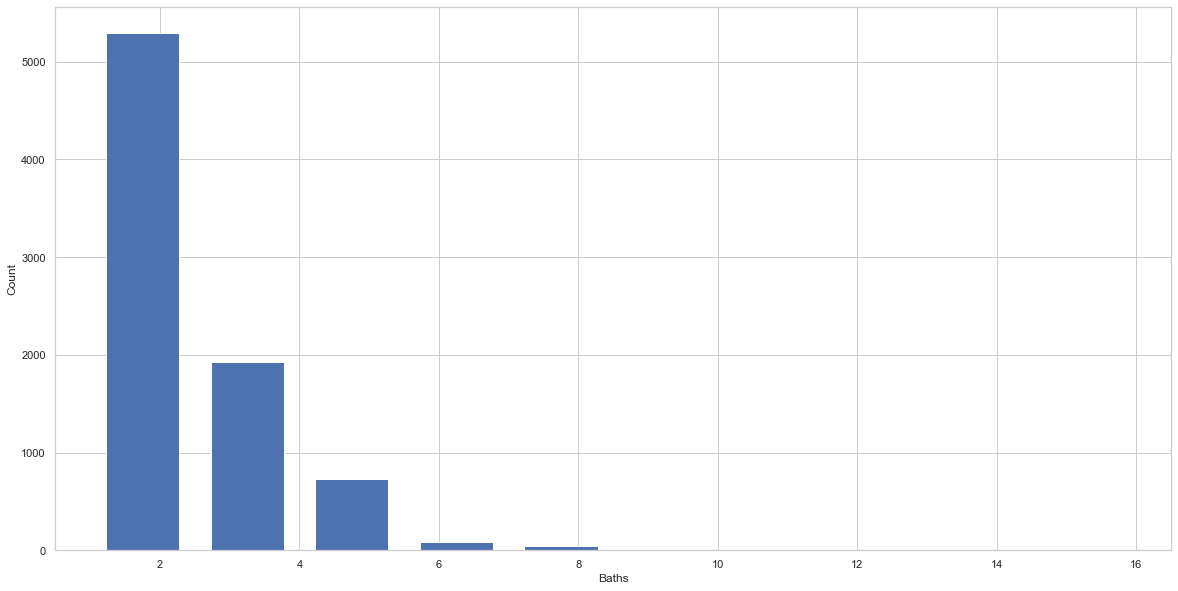

In [72]:
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.bath,rwidth = 0.7)
plt.xlabel("Baths")
plt.ylabel("Count")

In [73]:
len(df7[df7.bath >= df7.bhk+2])

80

In [74]:
df7.shape

(8089, 7)

In [75]:
df8 = df7[df7.bath < df7.bhk+2]
df8.shape
df8_new = df7_new[df7_new.bath < df7_new.bhk+2]
df8_new.shape

(8009, 9)

In [76]:
df8
df8_new[df8_new.bhk < df8_new.balcony]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Built-up Area,1st Phase JP Nagar,1 BHK,840.0,2.0,2.0,50.0,1,5952.380952
35,Super built-up Area,5th Block Hbr Layout,2 BHK,1312.0,2.0,3.0,69.0,2,5259.146341
40,Built-up Area,5th Phase JP Nagar,2 BHK,1150.0,3.0,3.0,52.5,2,4565.217391
54,Super built-up Area,5th Phase JP Nagar,2 BHK,1220.0,2.0,3.0,88.0,2,7213.114754
75,Super built-up Area,6th Phase JP Nagar,2 BHK,1180.0,2.0,3.0,80.0,2,6779.661017
...,...,...,...,...,...,...,...,...,...
11170,Super built-up Area,other,1 BHK,747.0,1.0,2.0,27.0,1,3614.457831
11176,Super built-up Area,other,1 BHK,500.0,1.0,2.0,51.0,1,10200.000000
11186,Super built-up Area,other,1 BHK,720.0,1.0,2.0,28.0,1,3888.888889
11192,Super built-up Area,other,1 BHK,540.0,1.0,2.0,24.0,1,4444.444444


# Outlier Removal Using Balcony Feature

Removing rows where the number of balconies is greater than 'number of bedrooms'.

In [77]:
df8_new = df8_new[df8_new.bhk >= df8_new.balcony]
df8_new

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2 BHK,1000.0,3.0,2.0,60.0,2,6000.000000
1,Super built-up Area,1st Block Jayanagar,3 BHK,1760.0,3.0,2.0,115.0,3,6534.090909
3,Super built-up Area,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3,8906.666667
4,Built-up Area,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,2.0,85.0,5,5666.666667
5,Super built-up Area,1st Phase JP Nagar,3 BHK,2065.0,4.0,1.0,210.0,3,10169.491525
...,...,...,...,...,...,...,...,...,...
11286,Super built-up Area,other,3 BHK,1508.0,3.0,1.0,77.0,3,5106.100796
11288,Super built-up Area,other,2 BHK,1095.0,2.0,1.0,57.0,2,5205.479452
11289,Built-up Area,other,2 BHK,1256.0,2.0,1.0,65.0,2,5175.159236
11290,Super built-up Area,other,2 BHK,1353.0,2.0,2.0,110.0,2,8130.081301


In [78]:
df9 = df8.drop(['price_per_sqft','size'],axis = 'columns')
df9
df9_new = df8_new.drop(['price_per_sqft','size'],axis = 'columns')
df9_new

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2
1,Super built-up Area,1st Block Jayanagar,1760.0,3.0,2.0,115.0,3
3,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3
4,Built-up Area,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5
5,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3
...,...,...,...,...,...,...,...
11286,Super built-up Area,other,1508.0,3.0,1.0,77.0,3
11288,Super built-up Area,other,1095.0,2.0,1.0,57.0,2
11289,Built-up Area,other,1256.0,2.0,1.0,65.0,2
11290,Super built-up Area,other,1353.0,2.0,2.0,110.0,2


# One Hot Encoding 

In [79]:
dummy = pd.get_dummies(df9.location)
dummy_new = pd.get_dummies(df9_new.location)
dummy.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df10 = pd.concat([df9,dummy],axis='columns')
df10_new = pd.concat([df9_new,dummy_new],axis='columns')

In [81]:
df10_new

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1760.0,3.0,2.0,115.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Built-up Area,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11286,Super built-up Area,other,1508.0,3.0,1.0,77.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11288,Super built-up Area,other,1095.0,2.0,1.0,57.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11289,Built-up Area,other,1256.0,2.0,1.0,65.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11290,Super built-up Area,other,1353.0,2.0,2.0,110.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
df11 = df10.drop(['other'],axis='columns')
df11_new = df10_new.drop(['other'],axis='columns')

In [83]:
df11_new.shape

(7727, 247)

In [84]:
df12= df11.drop(['location'],axis = 'columns')
df12.head()


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1000.0,3.0,60.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1760.0,3.0,115.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df12_new  = df11_new.drop(['location'],axis = 'columns')
df12_new.head()

,area_type,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1000.0,3.0,2.0,60.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1760.0,3.0,2.0,115.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1875.0,3.0,1.0,167.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Built-up Area,1500.0,5.0,2.0,85.0,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,2065.0,4.0,1.0,210.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df12_new.shape

(7727, 246)

In [87]:
dummy_new1 = pd.get_dummies(df12_new.area_type)
dummy_new1

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,0,1
3,0,0,0,1
4,1,0,0,0
5,0,0,0,1
...,...,...,...,...
11286,0,0,0,1
11288,0,0,0,1
11289,1,0,0,0
11290,0,0,0,1


In [88]:
df13_new = pd.concat([df12_new,dummy_new1],axis='columns')
df13_new.head()

,area_type,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,1000.0,3.0,2.0,60.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,1760.0,3.0,2.0,115.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Super built-up Area,1875.0,3.0,1.0,167.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Built-up Area,1500.0,5.0,2.0,85.0,5,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,Super built-up Area,2065.0,4.0,1.0,210.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
df14_new  = df13_new.drop(['area_type','Plot  Area'],axis = 'columns')
df14_new.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,1000.0,3.0,2.0,60.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1760.0,3.0,2.0,115.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1875.0,3.0,1.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1500.0,5.0,2.0,85.0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2065.0,4.0,1.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
x = df12.drop(['price'],axis = 'columns')
x.head()
x_new = df14_new.drop(['price'],axis = 'columns')
x_new.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,1000.0,3.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1760.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1875.0,3.0,1.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1500.0,5.0,2.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2065.0,4.0,1.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
y = df12.price
y.head()
y_new = df14_new.price
y_new.head()

0     60.0
1    115.0
3    167.0
4     85.0
5    210.0
Name: price, dtype: float64

# Building Model 

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 0)


In [93]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)


0.8182152769552207

In [94]:
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x_new,y_new,train_size = 0.8,random_state = 0)

In [95]:
lr_model_new = LinearRegression()
lr_model_new.fit(x_train_new,y_train_new)
lr_model_new.score(x_test_new,y_test_new)

0.861071159102658

#  K Fold cross validation 

In [96]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cv


ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None)

In [97]:
cross_val_score(LinearRegression(),x,y,cv = cv)

array([0.81821528, 0.83390187, 0.8495831 , 0.82222309, 0.87090886])

In [98]:
cross_val_score(LinearRegression(),x_new,y_new,cv = cv)

array([0.86107116, 0.90220597, 0.90279023, 0.82760385, 0.85720941])

#  Using GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

def get_best_model(x,y):
    algo = {
        'linear regression ':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0],  
            'solver': ['auto','lsqr']
        }
    }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 0)
    for algo_name,config in algo.items():
       print(algo_name)
       print(config)
       gs = GridSearchCV(config['model'],config['params'],cv = cv,return_train_score=False)
       gs.fit(x,y)
       scores.append({
           'model':algo_name,
           'best_score':gs.best_score_,
           'best_params':gs.best_params_
       })
    
    return pd.DataFrame(scores,columns = ['model','best_score','best_params'])
get_best_model(x,y)      

linear regression 
{'model': LinearRegression(), 'params': {'normalize': [True, False]}}
lasso
{'model': Lasso(), 'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}}
ridge
{'model': Ridge(), 'params': {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'lsqr']}}


,model,best_score,best_params
0,linear regression,0.838966,{'normalize': False}
1,lasso,0.806384,"{'alpha': 1, 'selection': 'cyclic'}"
2,ridge,0.840032,"{'alpha': 1.0, 'solver': 'auto'}"


In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

def get_best_model(x,y):
    algo = {
        'linear regression ':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0],  
            'solver': ['auto','lsqr']
        }
    }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 0)
    for algo_name,config in algo.items():
       print(algo_name)
       print(config)
       gs = GridSearchCV(config['model'],config['params'],cv = cv,return_train_score=False)
       gs.fit(x,y)
       scores.append({
           'model':algo_name,
           'best_score':gs.best_score_,
           'best_params':gs.best_params_
       })
    
    return pd.DataFrame(scores,columns = ['model','best_score','best_params'])
get_best_model(x_new,y_new) 

linear regression 
{'model': LinearRegression(), 'params': {'normalize': [True, False]}}
lasso
{'model': Lasso(), 'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}}
ridge
{'model': Ridge(), 'params': {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'lsqr']}}


,model,best_score,best_params
0,linear regression,0.870176,{'normalize': False}
1,lasso,0.836786,"{'alpha': 2, 'selection': 'random'}"
2,ridge,0.871086,"{'alpha': 1.0, 'solver': 'auto'}"


In [101]:
from sklearn.linear_model import Ridge
lr_model_new = Ridge()
lr_model_new.fit(x_train_new,y_train_new)
lr_model_new.score(x_test_new,y_test_new)

0.8617345516178102

In [102]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [103]:
x_new.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur', 'Built-up  Area',
       'Carpet  Area', 'Super built-up  Area'],
      dtype='object', length=247)

In [104]:
np.where(x.columns =='2nd Stage Nagarbhavi')

(array([6], dtype=int64),)

In [105]:
np.where(x_new.columns =='Carpet  Area')

(array([245], dtype=int64),)

In [106]:
def predict_price(loc,sqft,bath,bhk):
    loc_index = np.where(x.columns == loc)[0][0]
    
    res = np.zeros(len(x.columns))
    res[0] = sqft
    res[1] = bath
    res[2] = bhk
    if loc_index >= 0:
        res[loc_index] = 1
    return lr_model.predict([res])

In [107]:
def predict_price_new(loc,sqft,bath,bhk,balcony,area_type):
    loc_index = np.where(x_new.columns == loc)[0][0]
    area_index = np.where(x_new.columns == area_type)[0][0]
    
    res = np.zeros(len(x_new.columns))
    res[0] = sqft
    res[1] = bath
    res[2] = balcony
    res[3] = bhk
    if loc_index >= 0:
        res[loc_index] = 1
    if area_index >= 0:
        res[area_index] = 1
    return lr_model_new.predict([res])

In [110]:
predict_price('1st Phase JP Nagar',1000,2,2)

array([87.11102762])

In [111]:
predict_price_new('1st Phase JP Nagar',1000,2,2,1,'Carpet  Area')

array([93.2989303])

In [112]:
predict_price('Indira Nagar',1000,2,2)

array([93.2963891])

In [113]:
predict_price_new('Indira Nagar',1000,2,2,1,'Carpet  Area')

array([95.76951396])

In [114]:
import pickle
with open('home_price_model.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [115]:
import pickle
with open('home_price_model_new.pickle','wb') as f:
    pickle.dump(lr_model_new,f)

In [107]:
import json
cols = {
    'col':[col.lower() for col in x.columns]
    
}
with open("columns.json","w") as f:
    f.write(json.dumps(cols))

In [115]:
import json
cols = {
    'col':[col.lower() for col in x_new.columns]
    
}
with open("columns_new.json","w") as f:
    f.write(json.dumps(cols))